In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Mission 2
Appliquez un algorithme de classification, puis analysez le résultat obtenu.

In [2]:
#Importation du fichier source
data = pd.read_csv(r"C:\Users\elodi\Documents\DATA\Data Analyst\Projets\P6\notes.csv", sep=',')

### Classification par l'algorithme KNN

In [3]:
#Remplacement des valeurs true/false par 1 et 0
data['is_genuine'].replace([True, False], [1, 0], inplace = True)
display(data)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.67,103.74,103.70,4.01,2.87,113.29
2,1,171.83,103.76,103.76,4.40,2.88,113.84
3,1,171.80,103.78,103.65,3.73,3.12,113.63
4,1,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,0,172.11,104.23,104.45,5.24,3.58,111.78
166,0,173.01,104.59,104.31,5.04,3.05,110.91
167,0,172.47,104.27,104.10,4.88,3.33,110.68
168,0,171.82,103.97,103.88,4.73,3.55,111.87


In [4]:
#Préparation des données
X = data.drop('is_genuine', axis=1)
y = data['is_genuine']

In [5]:
#Séparation données test et d'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = model.predict(X_test)
y_pred 

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1], dtype=int64)

##### Matrice de confusion 
On peut évaluer son modèle par validation croisée. Cela permet d’avoir une idée de la sensibilité et de la spécificité du modèle obtenu.

In [9]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[30  0]
 [ 0 38]]


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        38

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



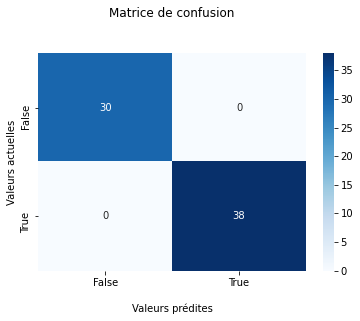

In [11]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Matrice de confusion\n\n');
ax.set_xlabel('\nValeurs prédites')
ax.set_ylabel('Valeurs actuelles');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

#plt.savefig('matrice.png')
plt.show()

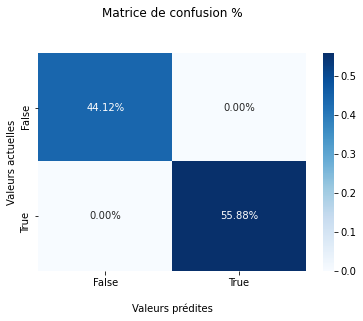

In [12]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Matrice de confusion %\n\n');
ax.set_xlabel('\nValeurs prédites')
ax.set_ylabel('Valeurs actuelles');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

#plt.savefig('matrice_%.png')
plt.show()

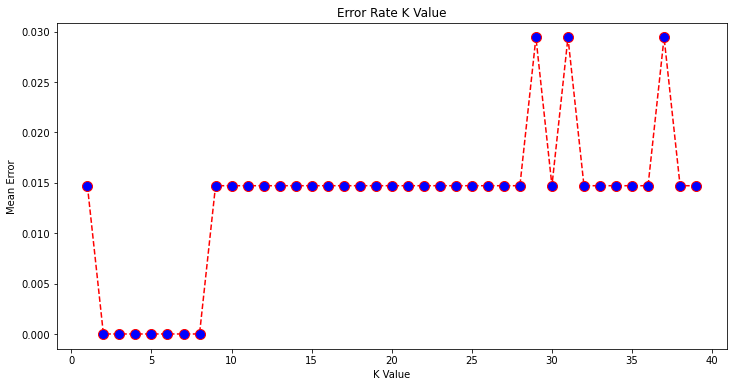

In [13]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

    

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#plt.savefig('mean_error.png')
plt.show()

##### Fonction de prédiction

In [14]:
#Importation du fichier test 
test = pd.read_csv(r"C:\Users\elodi\Downloads\example (1).csv", sep=',')
test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [15]:
def pred(fichier_csv):
    test = pd.read_csv(fichier_csv)
    test = test[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
    y_predict = model.predict_proba(test)
    return y_predict

In [16]:
pred(r"C:\Users\elodi\Downloads\example (1).csv")

array([[0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6]])